In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from google.colab import drive, files
import os

%matplotlib inline

In [ ]:
try:
  df_train = pd.read_csv("churn_train.csv")
except:
  files.upload()
  df_train = pd.read_csv("churn_train.csv")
df_train.info()
df_train.head()

Saving train_challenge_2.csv to train_challenge_2.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


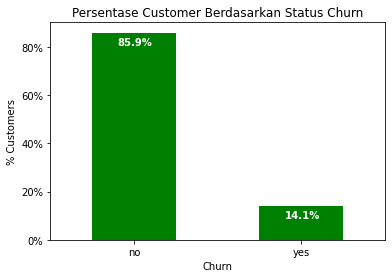

In [ ]:
ax = (df_train['churn'].value_counts()*100.0/len(df_train)).plot(kind='bar', stacked=True, rot=0, color='green')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("% Customers")
ax.set_xlabel("Churn")
ax.set_title("Persentase Customer Berdasarkan Status Churn")

totals = []  
for i in ax.patches:
  totals.append(i.get_width())
total = sum(totals)  
for i in ax.patches:
  ax.text(i.get_x()+.15, i.get_height()- 5, str(round((i.get_height()/total), 1))+'%', color='white', weight = 'bold')

In [ ]:
df = df_train.copy()
df.shape

(4250, 20)

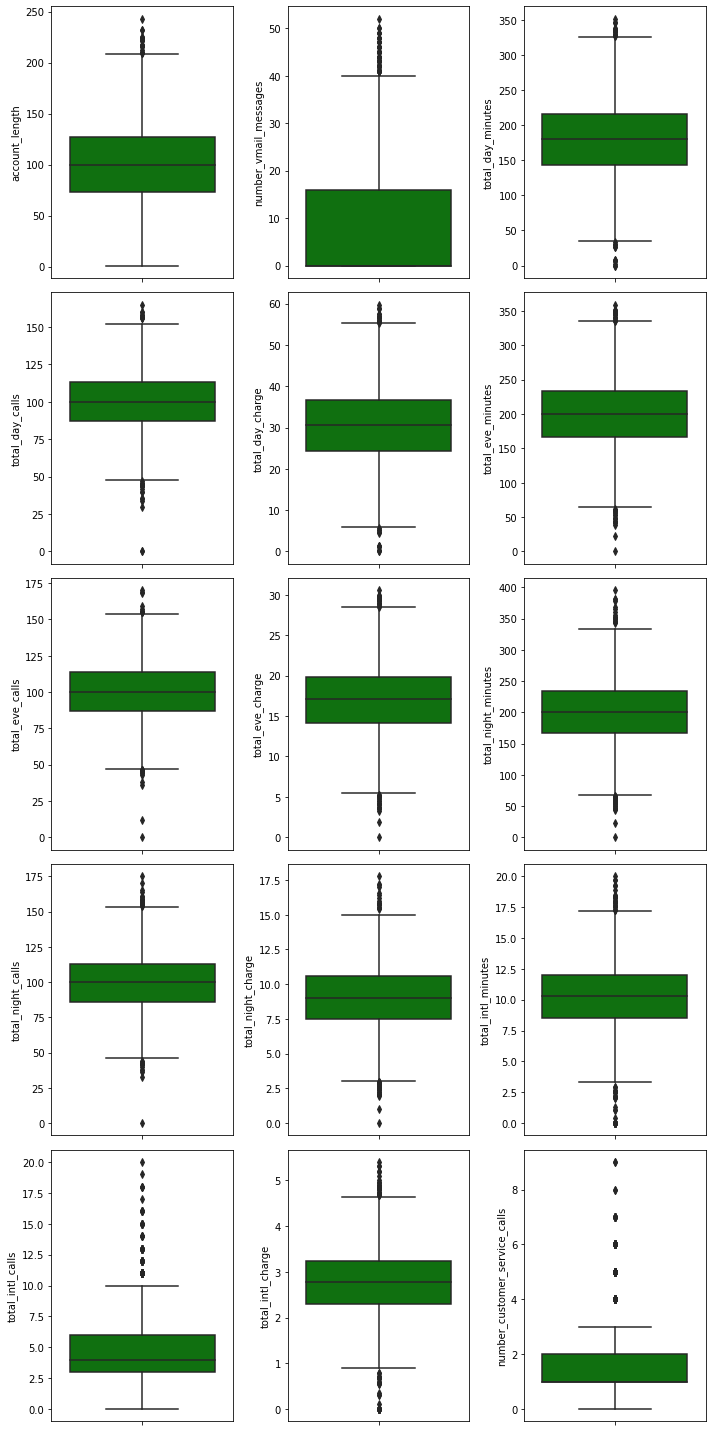

In [ ]:
plt.figure(figsize=(10,20))
j = 1
for i in range(df.shape[1]):
  if(str(df[df.columns[i]].dtypes) == 'float64' or str(df[df.columns[i]].dtypes) == 'int64'):
    plt.subplot(5,3,j)
    sns.boxplot(y=df[df.columns[i]], color='green', orient='v')
    plt.tight_layout()
    j += 1

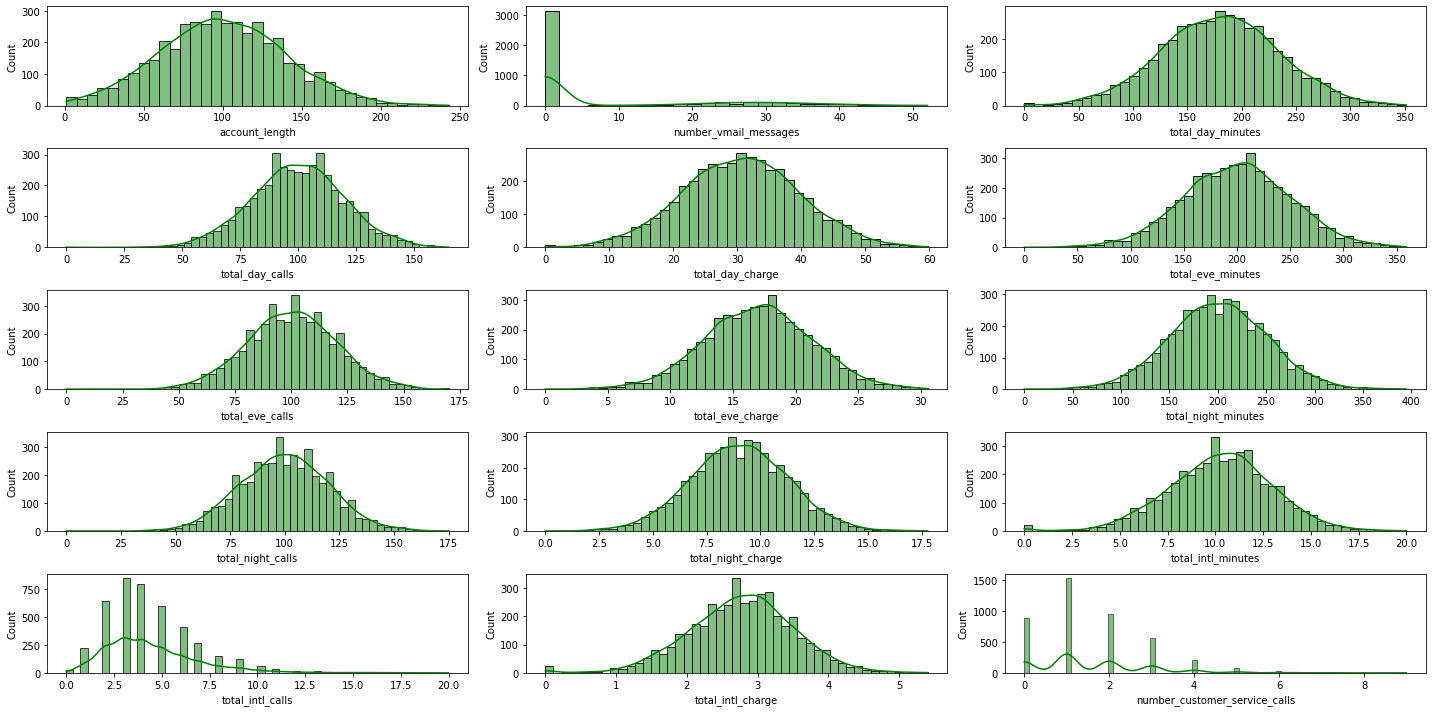

In [ ]:
plt.figure(figsize=(20,10))
counter = 1
for i in range (df.shape[1]):
  if(str(df[df.columns[i]].dtypes) == 'float64' or str(df[df.columns[i]].dtypes) == 'int64'):
    plt.subplot(5,3,counter)
    sns.histplot(df[df.columns[i]],color='green', kde=True)
    plt.tight_layout()
    counter += 1

In [ ]:
nums_col = []
cats_col = []
for i in range(df.shape[1]):
  if(str(df[df.columns[i]].dtypes) == 'object'):
    cats_col.append(df.columns[i])
  else:
    nums_col.append(df.columns[i])

print("nums columns: ", nums_col)
print("cats columns: ", cats_col)

nums columns:  ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']
cats columns:  ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


In [ ]:
# outlier filtering.
print(f'Jumlah baris sebelum outlier filtering: {len(df)}')

filtered_entries = np.array([True] * len(df)) 

for col in nums_col:
    zscore = abs(stats.zscore(df[col])) 
    filtered_entries = (zscore < 3) & filtered_entries 
    
df = df[filtered_entries] 

print(f'Jumlah baris setelah outlier filtering: {len(df)}')

Jumlah baris sebelum outlier filtering: 4250
Jumlah baris setelah outlier filtering: 4031


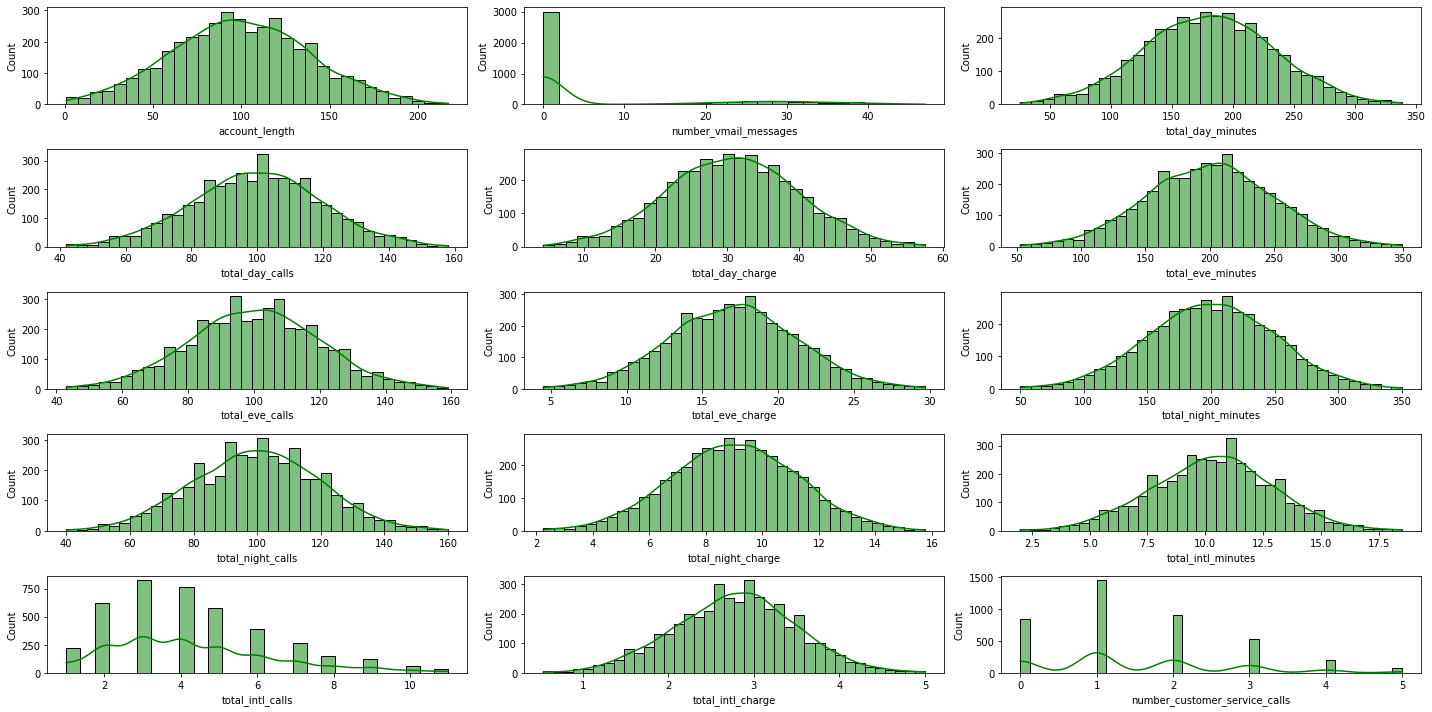

In [ ]:
plt.figure(figsize=(20,10))
counter = 1
for i in range (df.shape[1]):
  if(str(df[df.columns[i]].dtypes) == 'float64' or str(df[df.columns[i]].dtypes) == 'int64'):
    plt.subplot(5,3,counter)
    sns.histplot(df[df.columns[i]],color='green', kde=True)
    plt.tight_layout()
    counter += 1

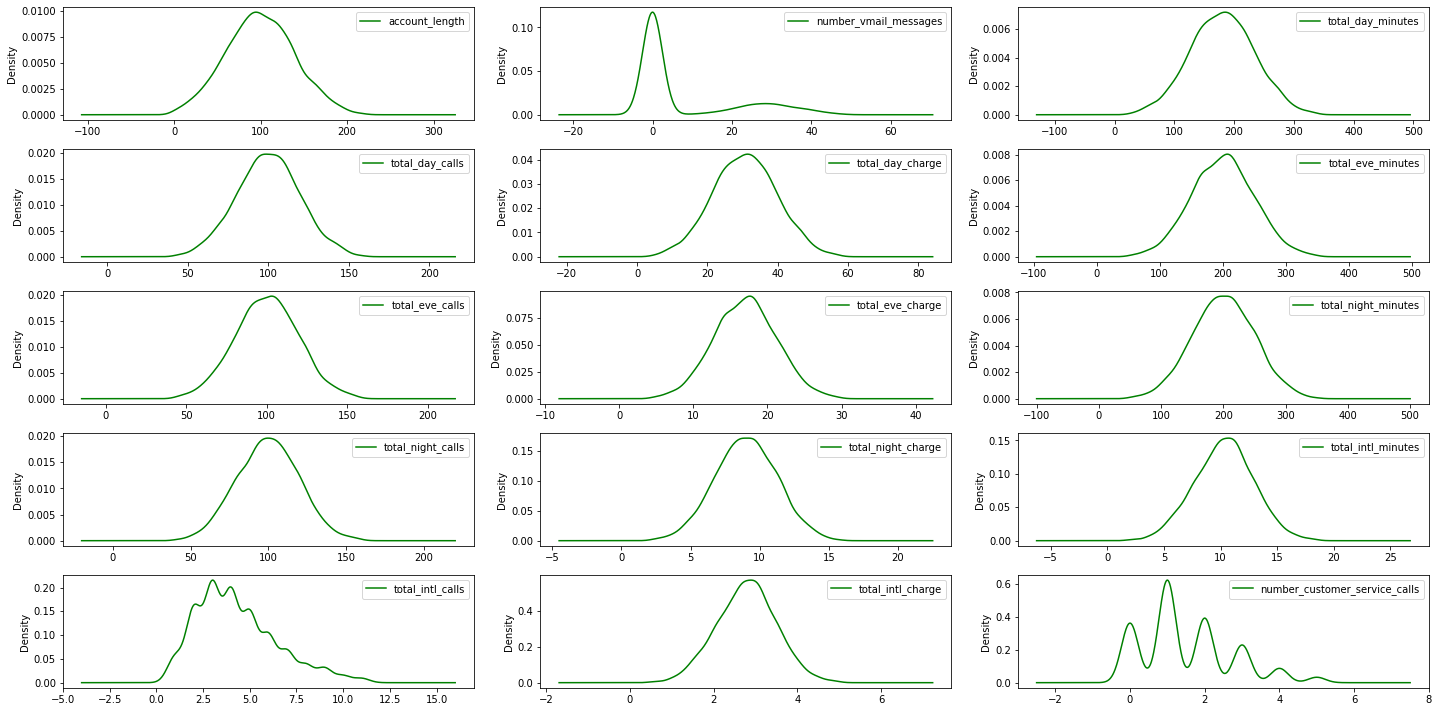

In [ ]:
df[nums_col].plot(kind='kde', subplots=True, color='green', sharex= False, layout=(5,3), figsize=(20,10))
plt.legend(loc='best')
plt.tight_layout()
plt.show()

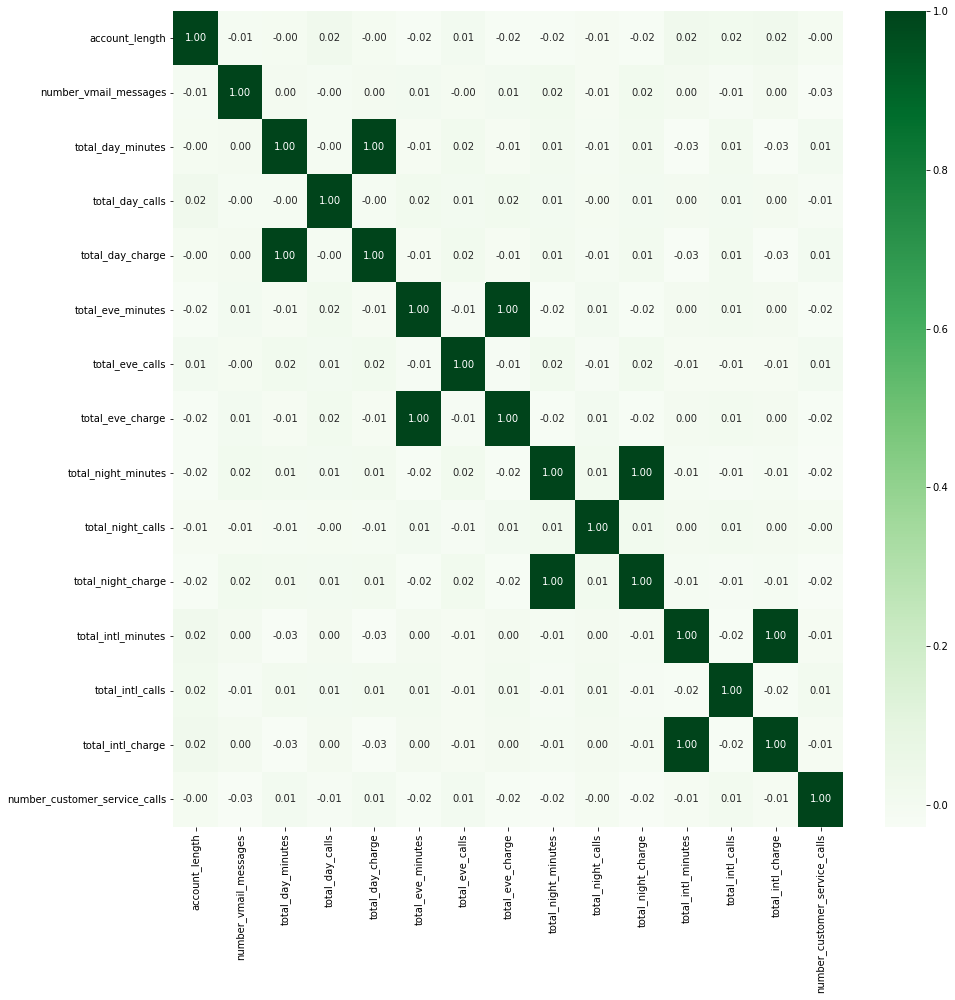

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='Greens', annot=True, fmt='.2f')

In [ ]:
def lower_triangle(df):
  dropped_pairs = set()
  cols = df.columns

  for i in range(df.shape[1]):
    for j in range(i+1):
      dropped_pairs.add((cols[i], cols[j]))

  return dropped_pairs

In [ ]:
df_corr = df_train.copy()
df_corr.drop(df.columns[[0, 2, 3, 4, 19]], axis=1, inplace=True)

In [ ]:
_corr = df.corr().abs().unstack()
labels_to_drop = lower_triangle(df_corr)
_corr = _corr.drop(labels_to_drop).sort_values(ascending=False)
print(_corr)

total_day_minutes      total_day_charge                 1.000000
total_eve_minutes      total_eve_charge                 1.000000
total_night_minutes    total_night_charge               0.999999
total_intl_minutes     total_intl_charge                0.999992
number_vmail_messages  number_customer_service_calls    0.027546
                                                          ...   
total_day_calls        total_night_calls                0.001229
total_eve_minutes      total_intl_charge                0.000726
total_eve_charge       total_intl_charge                0.000721
total_eve_minutes      total_intl_minutes               0.000646
total_eve_charge       total_intl_minutes               0.000641
Length: 105, dtype: float64


In [ ]:
print("Value Counts dari Data Train")
for col in cats_col:
  print(f"Value counts dari kolom {col}")
  print(df_train[col].value_counts())
  print()

Value Counts dari Data Train
Value counts dari kolom state
WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
WA     80
NC     80
MO     80
DE     80
CO     80
MT     80
IL     79
TN     79
NM     78
OK     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
DC     72
SC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64

Value counts dari kolom area_code
area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

Value counts dari kolom international_plan
no     3854
yes     396
Name: international_plan, dtype: int64

Value counts dari kolom voice_mail_plan
no     3138
yes    1112
Name: voice_mail_plan, dtype: int64

Value counts dari kolom churn
no     3652
yes     598
Name: churn

In [ ]:
df_train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_train.drop(df_train.columns[[0, 2]], axis=1, inplace=True)
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   international_plan             4250 non-null   object 
 2   voice_mail_plan                4250 non-null   object 
 3   number_vmail_messages          4250 non-null   int64  
 4   total_day_minutes              4250 non-null   float64
 5   total_day_calls                4250 non-null   int64  
 6   total_day_charge               4250 non-null   float64
 7   total_eve_minutes              4250 non-null   float64
 8   total_eve_calls                4250 non-null   int64  
 9   total_eve_charge               4250 non-null   float64
 10  total_night_minutes            4250 non-null   float64
 11  total_night_calls              4250 non-null   int64  
 12  total_night_charge             4250 non-null   f

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
try:
  df_pred = pd.read_csv("churn_pred.csv")
except:
  dataset_file = files.upload()
  df_pred = pd.read_csv("churn_pred.csv")
  
df_pred.drop(df_pred.columns[[0, 1, 3]], axis=1, inplace=True)
df_pred.info()
df_pred.head()

Saving test_challenge_2.csv to test_challenge_2.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 750 non-null    int64  
 1   international_plan             750 non-null    object 
 2   voice_mail_plan                750 non-null    object 
 3   number_vmail_messages          750 non-null    int64  
 4   total_day_minutes              750 non-null    float64
 5   total_day_calls                750 non-null    int64  
 6   total_day_charge               750 non-null    float64
 7   total_eve_minutes              750 non-null    float64
 8   total_eve_calls                750 non-null    int64  
 9   total_eve_charge               750 non-null    float64
 10  total_night_minutes            750 non-null    float64
 11  total_night_calls              750 non-null    int64  
 12

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,118,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,62,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,93,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,174,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


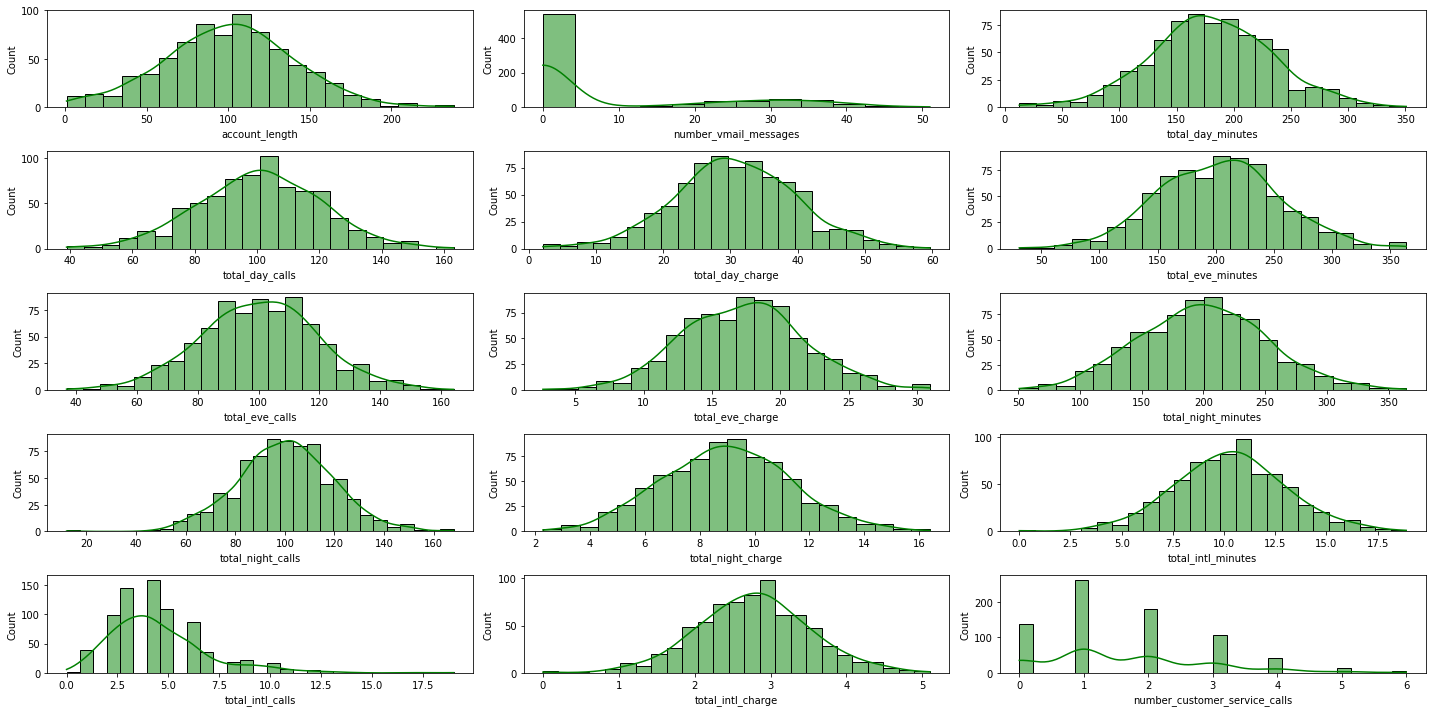

In [ ]:
plt.figure(figsize=(20,10))
counter = 1
for i in range (df_pred.shape[1]):
  if(str(df_pred[df_pred.columns[i]].dtypes) == 'float64' or str(df_pred[df_pred.columns[i]].dtypes) == 'int64'):
    plt.subplot(5,3,counter)
    sns.histplot(df_pred[df_pred.columns[i]],color='green', kde=True)
    plt.tight_layout()
    counter += 1

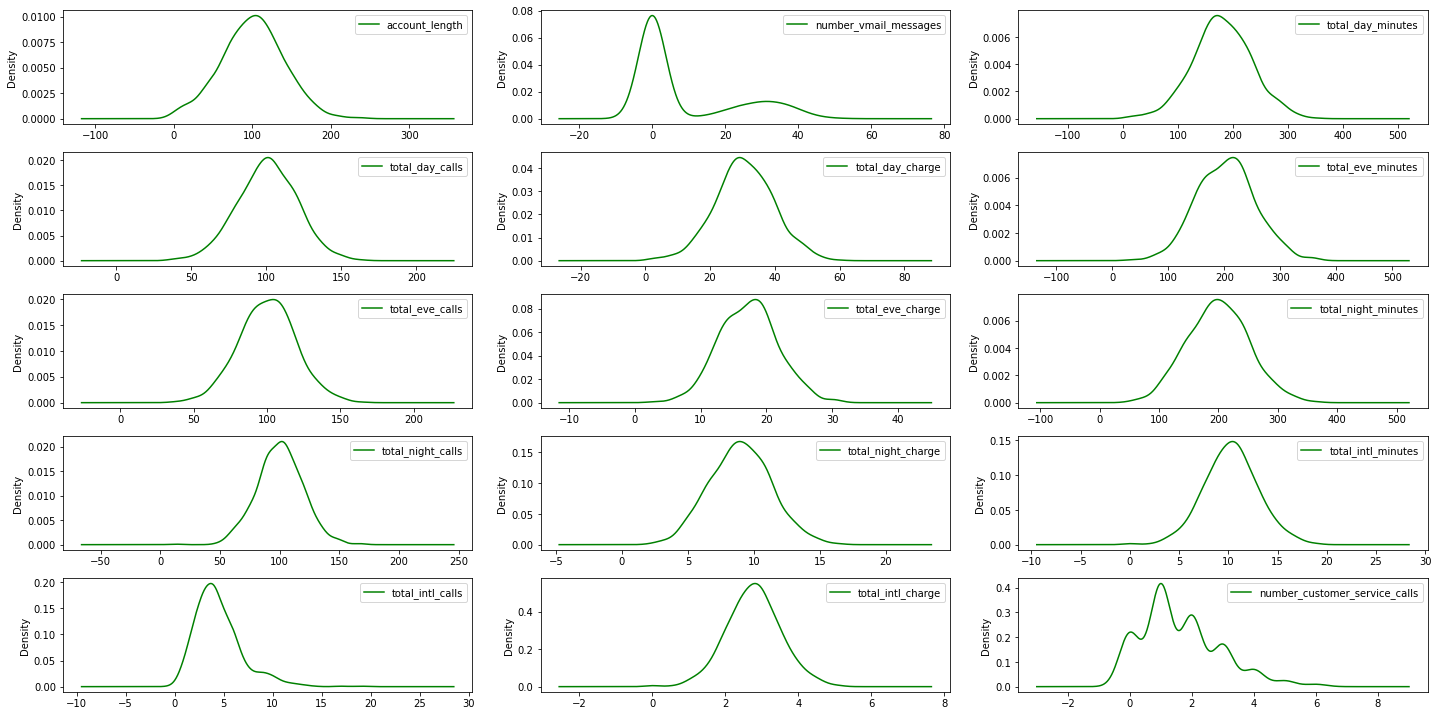

In [ ]:
df_pred[nums_col].plot(kind='kde', subplots=True, color='green', sharex= False, layout=(5,3), figsize=(20,10))
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
df_pred.isnull().sum()

account_length                   0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [ ]:
df_pred.duplicated().sum()

0

In [ ]:
labelEncoder = LabelEncoder()

for col in cats_col:
  try:
    df_train[col] = labelEncoder.fit_transform(df_train[col])
    df_pred[col] = labelEncoder.fit_transform(df_pred[col])
  except:
    pass

In [ ]:
df_train.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [ ]:
df_pred.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,62,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,93,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,174,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
X = df_train.loc[:, df_train.columns != "churn"]
y = df_train.loc[:, "churn"]
X_pred = df_pred

y.value_counts()

0    3652
1     598
Name: churn, dtype: int64

In [ ]:
print("Value Counts dari Data Train")
for col in ['international_plan', 'voice_mail_plan']:
  print(X[col].value_counts())
  print()

print("Value Counts dari Data Prediksi")
for col in ['international_plan', 'voice_mail_plan']:
  print(X_pred[col].value_counts())
  print()

Value Counts dari Data Train
0    3854
1     396
Name: international_plan, dtype: int64

0    3138
1    1112
Name: voice_mail_plan, dtype: int64

Value Counts dari Data Prediksi
0    673
1     77
Name: international_plan, dtype: int64

0    539
1    211
Name: voice_mail_plan, dtype: int64



In [ ]:
scaler = StandardScaler()
scaler_fit = scaler.fit(X)
X_scaled = scaler_fit.transform(X)
print(X_scaled)

[[ 0.17039882 -0.32054702  1.67986382 ... -0.57916393  1.24859124
  -0.42634613]
 [ 0.92618569 -0.32054702 -0.59528635 ...  0.2329267   0.69834168
  -1.1889602 ]
 [-0.40903778  3.11966717 -0.59528635 ...  1.04501732 -1.32818716
   0.33626795]
 ...
 [-0.63577385 -0.32054702 -0.59528635 ...  1.04501732 -1.2208214
  -0.42634613]
 [-1.26559624 -0.32054702  1.67986382 ...  0.2329267  -0.13374301
   0.33626795]
 [-0.35865199 -0.32054702  1.67986382 ...  4.69942514 -0.34847454
  -1.1889602 ]]


In [ ]:
scaler_fit_pred = scaler.fit(X_pred)
X_pred_scaled = scaler_fit_pred.transform(X_pred)
print(X_pred_scaled)

[[ 0.69606476 -0.33825002  1.59828107 ... -0.61370155 -0.10697644
  -0.49763904]
 [ 0.44400133  2.95639303 -0.62567218 ...  0.62582133 -1.44529723
  -1.28173416]
 [-0.96755388 -0.33825002 -0.62567218 ...  0.62582133  1.01721302
   1.85464633]
 ...
 [ 1.301017   -0.33825002 -0.62567218 ... -1.02687584  1.59269096
   1.07055121]
 [-0.99276022 -0.33825002 -0.62567218 ... -0.20052726  1.19119472
  -0.49763904]
 [ 0.21714424 -0.33825002 -0.62567218 ...  0.62582133 -0.64230476
  -1.28173416]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
model2 = RandomForestClassifier(n_estimators=100)
model2.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
model3 = SVC()
model3.fit(X_train, y_train)

SVC()

In [ ]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

accuracy1 = round(accuracy_score(y_test, y_pred1), 4)
accuracy2 = round(accuracy_score(y_test, y_pred2), 4)
accuracy3 = round(accuracy_score(y_test, y_pred3), 4)

print("Accuracy Model Support Vector Classifier: ", round(accuracy3*100.0, 2), " %")
print("Accuracy Model Decision Tree Classifier: ", round(accuracy1*100.0, 2), " %")
print("Accuracy Model Random Forest Classifer: ", round(accuracy2*100.0, 2), " %")

Accuracy Model Support Vector Classifier:  92.82  %
Accuracy Model Decision Tree Classifier:  91.53  %
Accuracy Model Random Forest Classifer:  96.82  %


In [ ]:
recall1 = round(recall_score(y_test, y_pred1), 4)
recall2 = round(recall_score(y_test, y_pred2), 4)
recall3 = round(recall_score(y_test, y_pred3), 4)

print("Recall Score Model Support Vector Classifier: ", round(recall3*100.0, 2), " %")
print("Recall Score Model Decision Tree Classifier: ", round(recall1*100.0, 2), " %")
print("Recall Score Model Random Forest Classifer: ", round(recall2*100.0, 2), " %")

Recall Score Model Support Vector Classifier:  58.14  %
Recall Score Model Decision Tree Classifier:  72.87  %
Recall Score Model Random Forest Classifer:  82.17  %


In [ ]:
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)

print(cm1)
print(cm2)
print(cm3)

[[684  37]
 [ 35  94]]
[[717   4]
 [ 23 106]]
[[714   7]
 [ 54  75]]


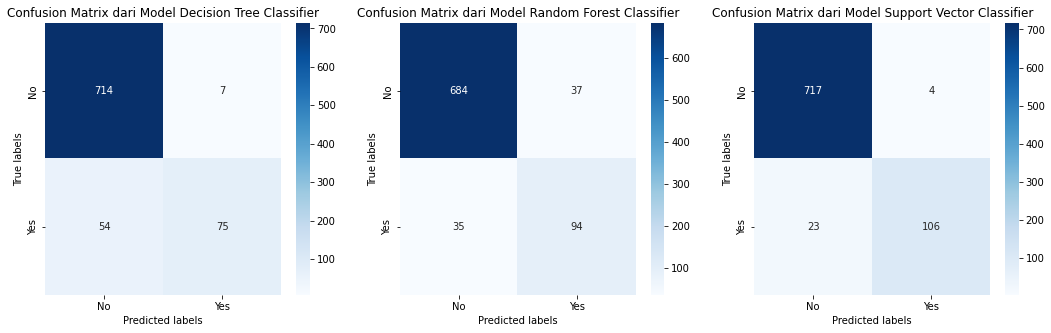

In [ ]:
cm_list = [cm3, cm1, cm2]
plt.figure(figsize=(18,5))
model_str = ["Support Vector Classifier", "Decision Tree Classifier", "Random Forest Classifier"]
for i in range(3):
  ax= plt.subplot(1,3,i+1)
  sns.heatmap(cm_list[i], annot=True, fmt='g', cmap='Blues',ax=ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title(f'Confusion Matrix dari Model {model_str[i]}')
  ax.xaxis.set_ticklabels(['No', 'Yes'])
  ax.yaxis.set_ticklabels(['No', 'Yes'])
plt.show()

In [ ]:
pd.DataFrame(y_pred1).value_counts()

0    719
1    131
dtype: int64

In [ ]:
X_test

array([[-1.61829678, -0.32054702, -0.59528635, ...,  0.2329267 ,
         0.22861645, -0.42634613],
       [-2.1221547 , -0.32054702, -0.59528635, ...,  1.45106264,
         0.16151285, -0.42634613],
       [-0.03114435, -0.32054702, -0.59528635, ..., -0.98520924,
         0.41650654,  1.09888202],
       ...,
       [ 1.20330755, -0.32054702, -0.59528635, ...,  0.2329267 ,
        -0.09348085,  0.33626795],
       [ 0.22078461, -0.32054702, -0.59528635, ..., -0.17311861,
        -0.75109617, -0.42634613],
       [ 0.17039882, -0.32054702, -0.59528635, ..., -0.57916393,
         1.06070114, -0.42634613]])

In [ ]:
y_pred_test1 = model1.predict(X_pred_scaled)
y_pred_test2 = model2.predict(X_pred_scaled)
y_pred_test3 = model3.predict(X_pred_scaled)

In [ ]:
df_y_pred1 = pd.DataFrame(y_pred_test1)
df_y_pred1.value_counts()

0    640
1    110
dtype: int64

In [ ]:
df_y_pred2 = pd.DataFrame(y_pred_test2)
df_y_pred2.value_counts()

0    661
1     89
dtype: int64

In [ ]:
df_y_pred3 = pd.DataFrame(y_pred_test3)
df_y_pred3.value_counts()

0    687
1     63
dtype: int64

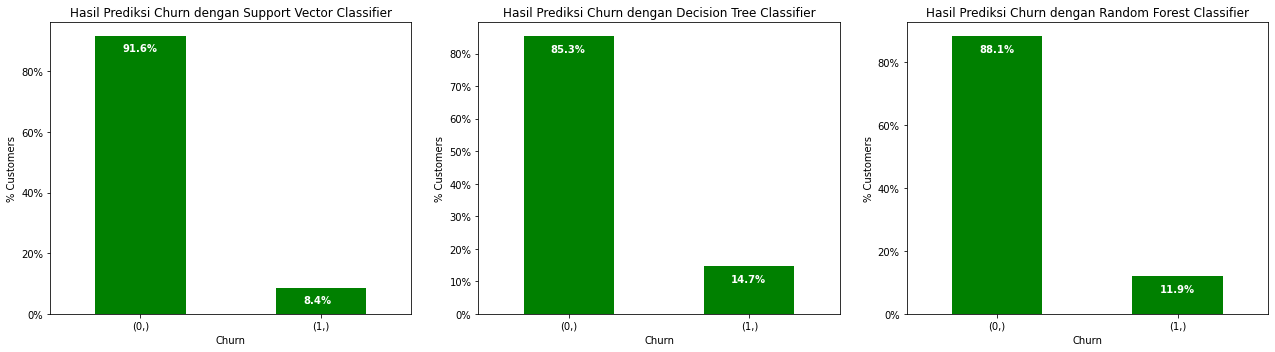

In [ ]:
plt.figure(figsize=(18,5))
plot_df = [df_y_pred3, df_y_pred1, df_y_pred2]
model_str = ["Support Vector Classifier", "Decision Tree Classifier", "Random Forest Classifier"]
for i in range(1,4):
  plt.subplot(1,3,i)
  ax = (plot_df[i-1].value_counts()*100.0/len(plot_df[i-1])).plot(kind='bar', stacked=True, rot=0, color='green')
  ax.yaxis.set_major_formatter(mtick.PercentFormatter())
  ax.set_ylabel("% Customers")
  ax.set_xlabel("Churn")
  ax.set_title(f"Hasil Prediksi Churn dengan {model_str[i-1]}")

  totals = []  
  for i in ax.patches:
    totals.append(i.get_width())
  total = sum(totals)  
  for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()- 5, str(round((i.get_height()/total), 1))+'%', color='white', weight = 'bold')

plt.tight_layout()
plt.show()